In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hotels = pd.read_excel("../Data/HotelCustomersDataset.xlsx")

hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Assignment 1: Bar and Hist

* Build a histogram of lodging revenue with Seaborn. Filter your data to rows where LodgingRevenue is less than 1500. What might be causing so many nights to have 0?
* Then, build a horizontal bar chart plotting the average room nights stayed for our top 5 countries by revenue ("DEU", "FRA", "PRT", "GBR", "ESP"). Change the color palette.

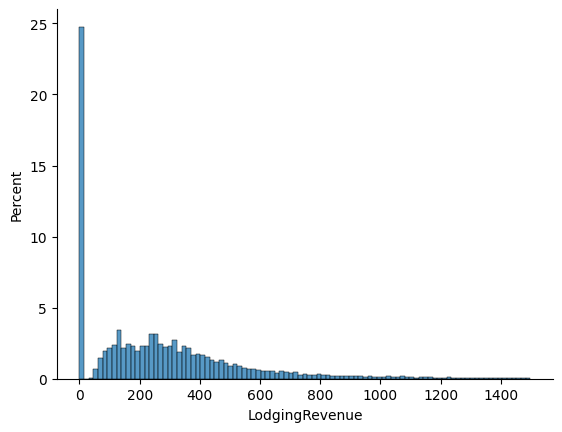

In [3]:
sns.histplot(
    x="LodgingRevenue", 
    stat='percent',
    data=hotels.query("LodgingRevenue < 1500")
)

sns.despine()

In [4]:
hotels.loc[hotels["LodgingRevenue"] == 0].describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,20408.000000,19431.000000,20408.000000,20408.000000,20408.0,20408.000000,20408.000000,20408.0,20408.000000,20408.000000,...,20408.000000,20408.000000,20408.000000,20408.000000,20408.000000,20408.000000,20408.000000,20408.000000,20408.000000,20408.000000
mean,59745.453156,39.509958,227.675813,1.046746,0.0,0.893267,0.000784,0.0,0.029547,0.085212,...,0.000784,0.003332,0.001617,0.025284,0.365004,0.159349,0.000245,0.002842,0.000245,0.090994
std,18444.889296,19.632375,226.324519,16.071189,0.0,43.534632,0.031296,0.0,0.320727,0.901228,...,0.027990,0.057629,0.040181,0.156991,0.481443,0.366010,0.015651,0.053236,0.015651,0.287607
min,3.000000,-7.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51657.750000,25.000000,107.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62806.500000,41.000000,177.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,72285.500000,55.000000,266.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,122.000000,1095.000000,588.000000,0.0,5105.500000,2.000000,0.0,34.000000,78.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# MarketSegment

hotels.loc[:, "DistributionChannel"].value_counts()

DistributionChannel
Travel Agent/Operator      68569
Direct                     11912
Corporate                   2600
Electronic Distribution      509
Name: count, dtype: int64

In [6]:
# MarketSegment

hotels.loc[hotels["LodgingRevenue"] == 0, "DistributionChannel"].value_counts()

DistributionChannel
Travel Agent/Operator      16472
Direct                      3664
Corporate                    252
Electronic Distribution       20
Name: count, dtype: int64

In [7]:
top5_countries = hotels.query("Nationality in ['GBR', 'PRT', 'FRA', 'DEU', 'ESP']")

/var/folders/bm/h1t1wfk16y5gv2b9svjm7mzw0000gn/T/ipykernel_3650/610660969.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/bm/h1t1wfk16y5gv2b9svjm7mzw0000gn/T/ipykernel_3650/610660969.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


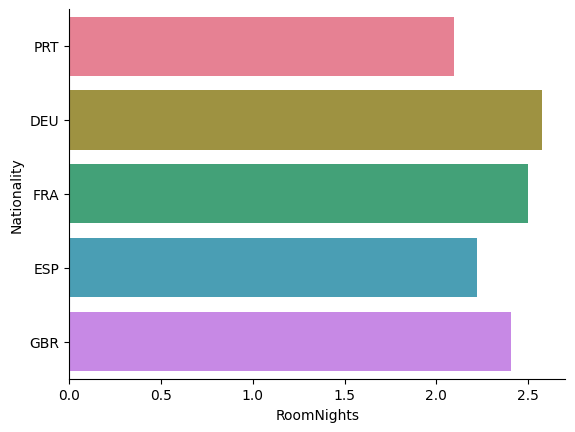

In [11]:
top5 = ['GBR', 'PRT', 'FRA', 'DEU', 'ESP']

top5_countries = hotels.query("Nationality in @top5")

sns.barplot(
    x="RoomNights",
    y="Nationality",
    data=top5_countries,
    ci=None,
    palette="husl"
)

sns.despine()

# Assignment 2: Box and Violin

* Build a single boxplot of LodgingRevenue for our top 5 countries, where nightly revenue is less than 1500.
* Then, build a chart that has one violinplot for each country. Look at these plots both without a filter and with lodging revenue filtered to less than 1500.
* Finally, build a violinplot for the Age distribution for each of our top 5 countries.

<Axes: ylabel='LodgingRevenue'>

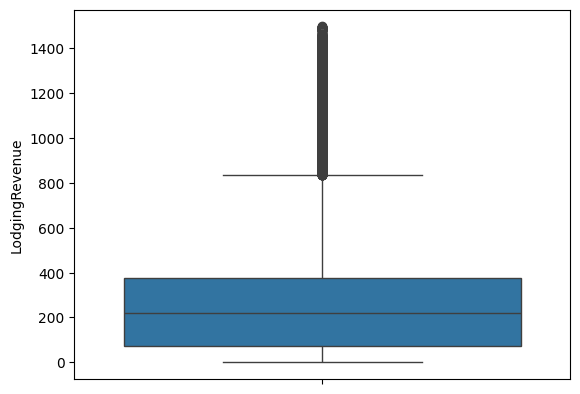

In [12]:
sns.boxplot(y="LodgingRevenue", data=top5_countries.query("LodgingRevenue < 1500"))

<Axes: xlabel='Nationality', ylabel='LodgingRevenue'>

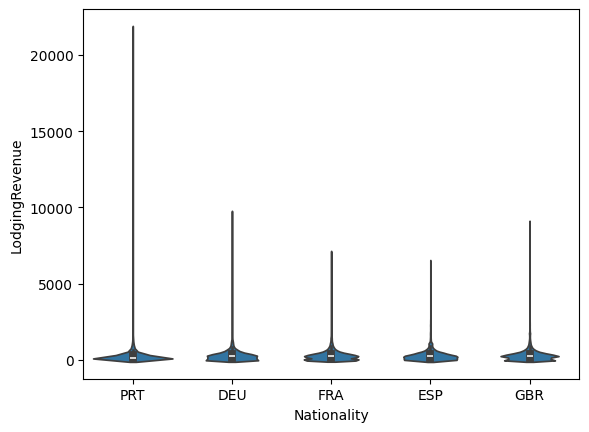

In [15]:
sns.violinplot(
    x="Nationality",
    y="LodgingRevenue",
    data=top5_countries
)

<Axes: xlabel='Nationality', ylabel='LodgingRevenue'>

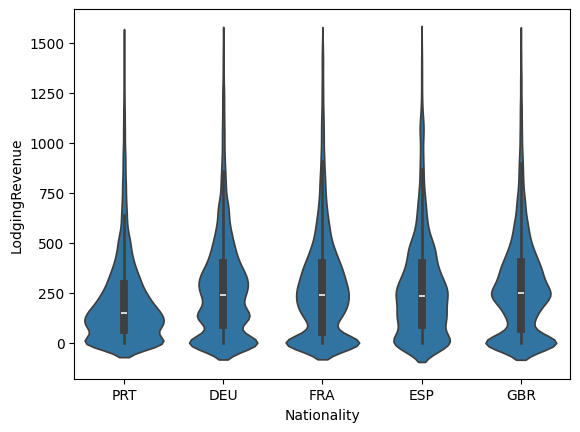

In [16]:
sns.violinplot(
    x="Nationality",
    y="LodgingRevenue",
    data=top5_countries.query("LodgingRevenue < 1500")
)

<Axes: xlabel='Nationality', ylabel='Age'>

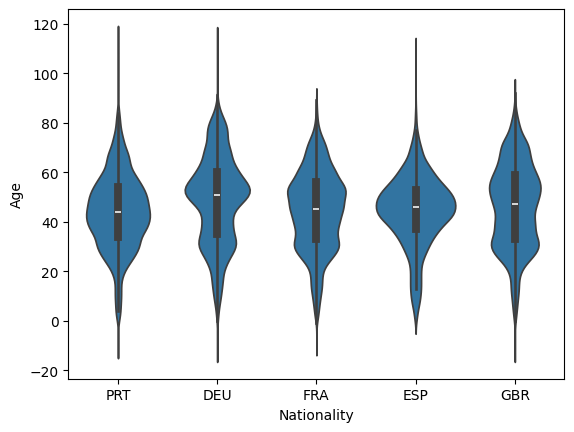

In [17]:
sns.violinplot(
    x="Nationality",
    y="Age",
    data=top5_countries
)

<Axes: ylabel='RoomNights'>

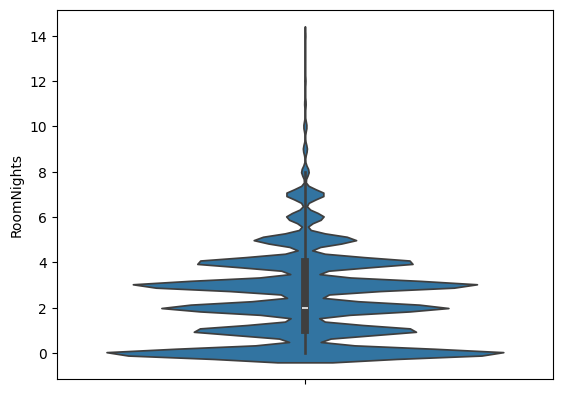

In [18]:
sns.violinplot(y="RoomNights", data=hotels.query("RoomNights < 15"))

# Assigment 3: Linear Relationship Plots

* Build a plot with a regression line comparing LodgingRevenue as y and RoomNights as x for rows in our top 5 countries.
* Then, build the same chart in bullet 1 but with a separate line for each of our top 5 countries. Which country appears to pay the most per night?
* Finally, build a pairplot with the columns: Age, LodgingRevenue, OtherRevenue, PersonsNights, RoomNights, and DaysSinceLastStay

<Axes: xlabel='RoomNights', ylabel='LodgingRevenue'>

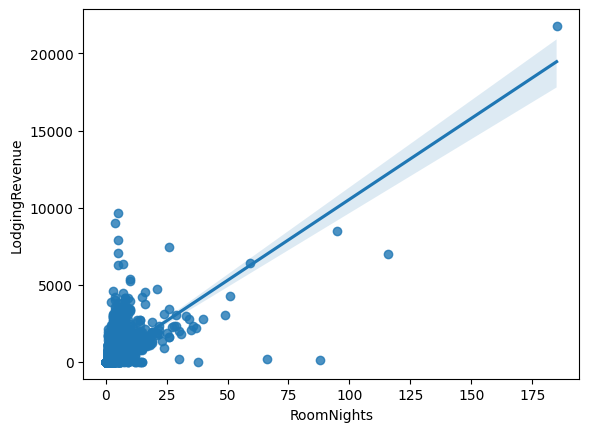

In [19]:
sns.regplot(
    x="RoomNights",
    y="LodgingRevenue",
    data=top5_countries
)

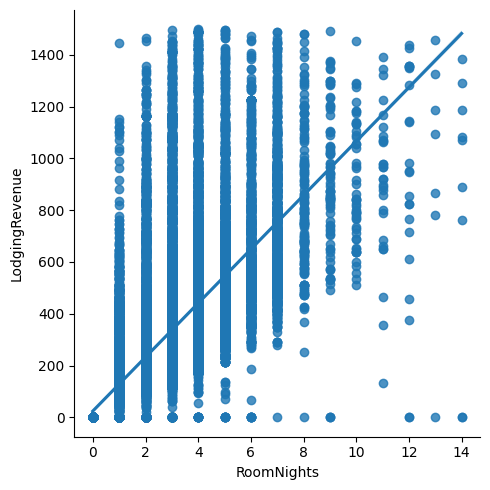

In [22]:
sns.lmplot(
    x="RoomNights",
    y="LodgingRevenue",
    data=top5_countries.query("LodgingRevenue < 1500 and RoomNights < 15")
)

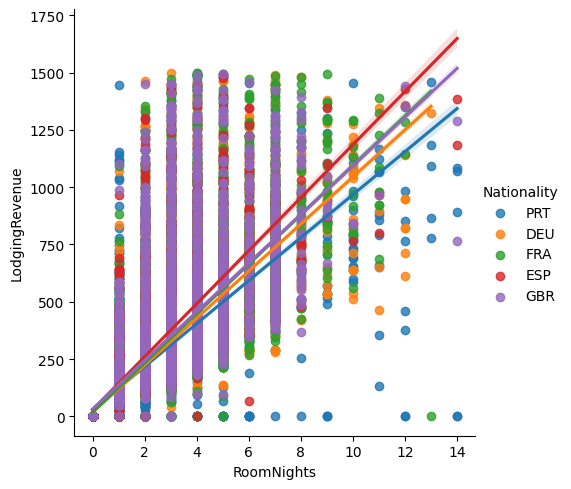

In [23]:
sns.lmplot(
    x="RoomNights",
    y="LodgingRevenue",
    hue="Nationality",
    data=top5_countries.query("LodgingRevenue < 1500 and RoomNights < 15")
)

In [24]:
top5_countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47809 entries, 0 to 83583
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    47809 non-null  int64  
 1   Nationality           47809 non-null  object 
 2   Age                   44031 non-null  float64
 3   DaysSinceCreation     47809 non-null  int64  
 4   AverageLeadTime       47809 non-null  int64  
 5   LodgingRevenue        47809 non-null  float64
 6   OtherRevenue          47809 non-null  float64
 7   BookingsCanceled      47809 non-null  int64  
 8   BookingsNoShowed      47809 non-null  int64  
 9   BookingsCheckedIn     47809 non-null  int64  
 10  PersonsNights         47809 non-null  int64  
 11  RoomNights            47809 non-null  int64  
 12  DaysSinceLastStay     47809 non-null  int64  
 13  DaysSinceFirstStay    47809 non-null  int64  
 14  DistributionChannel   47809 non-null  object 
 15  MarketSegment         47

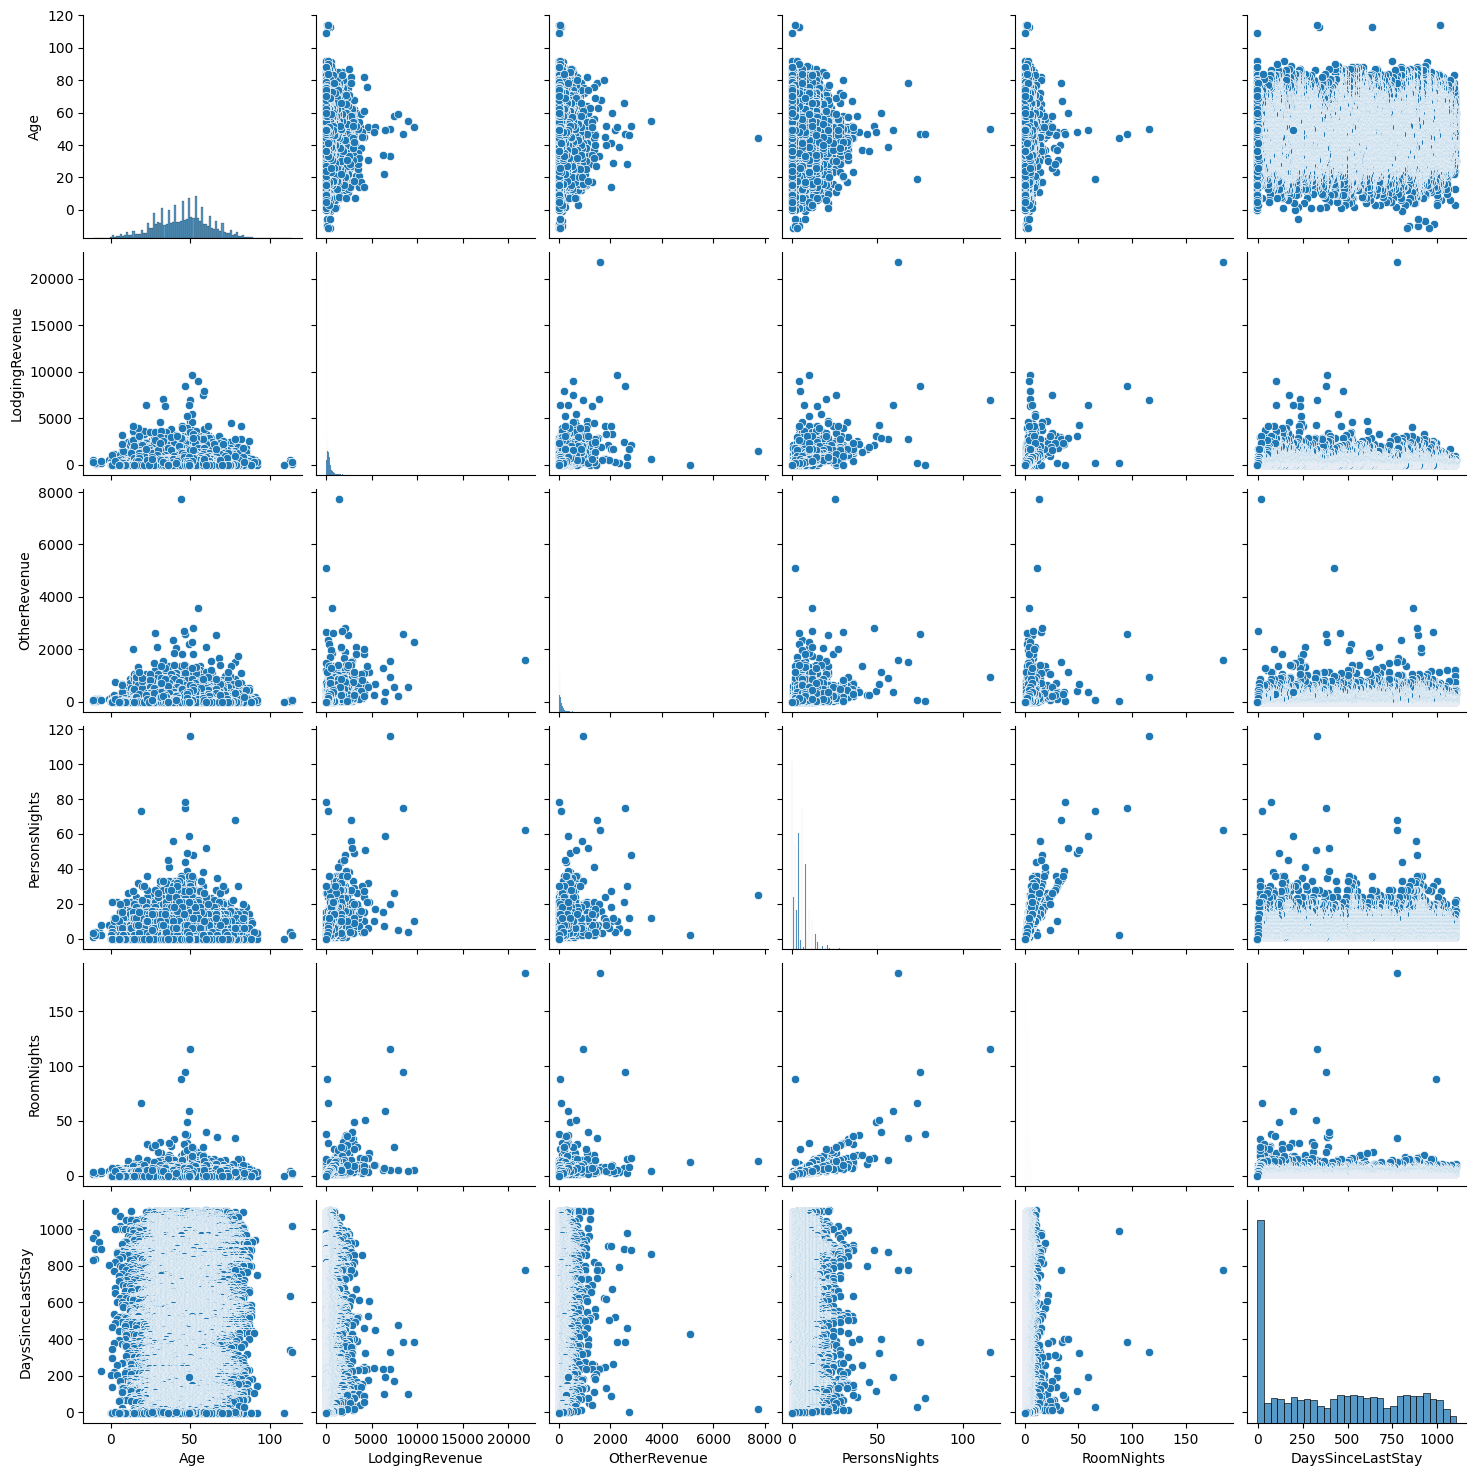

In [25]:
sns.pairplot(data=top5_countries.iloc[:, [2, 5, 6, 10, 11, 12]])

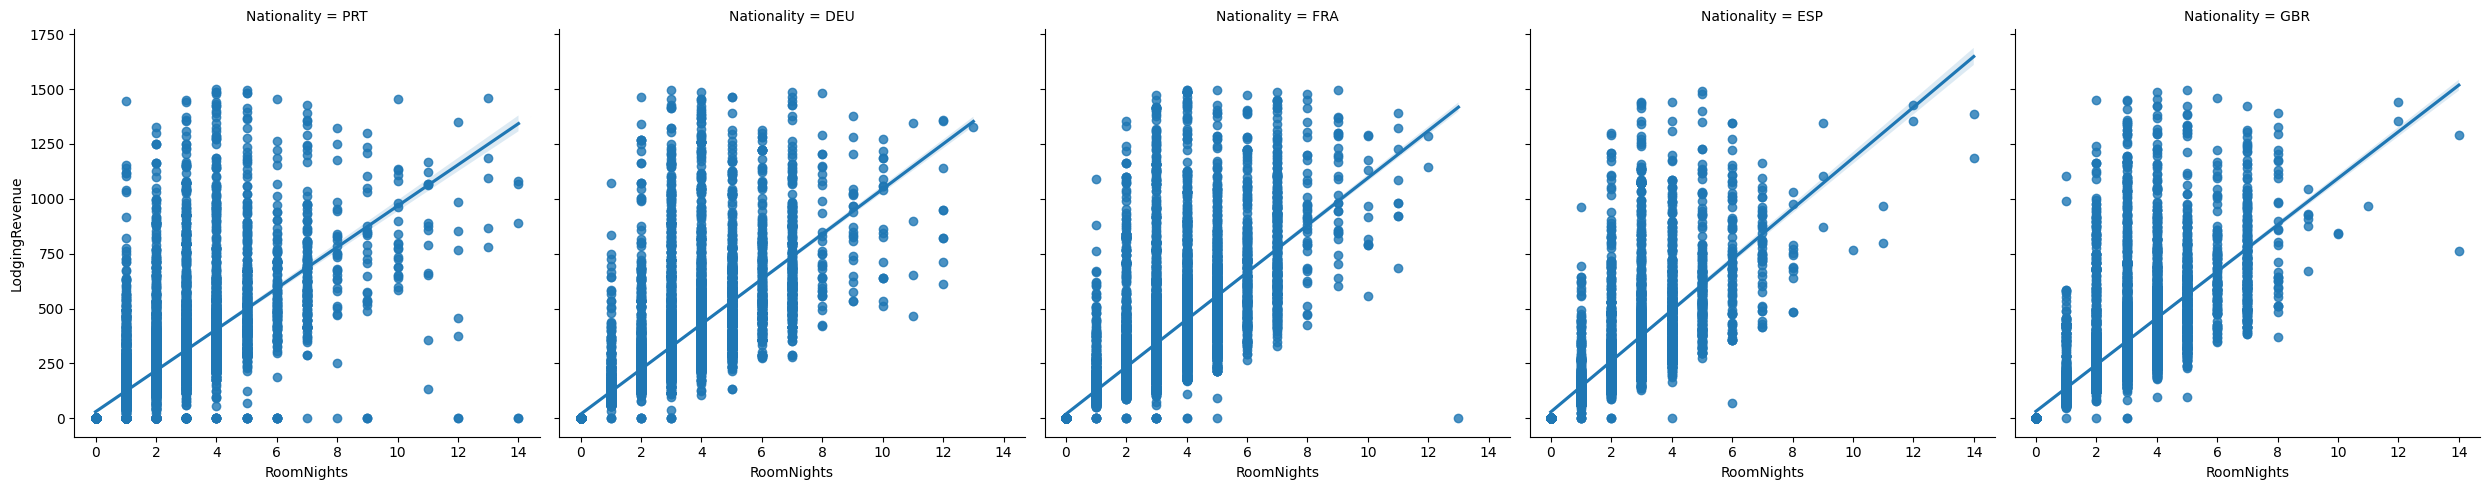

In [26]:
sns.lmplot(
    x="RoomNights",
    y="LodgingRevenue",
    col="Nationality",
    data=top5_countries.query("LodgingRevenue < 1500 and RoomNights < 15")
)

# Assignment 4 Heatmaps


* Using the top 5 countries DataFrame, Build a heatmap of Nationality as rows and MarketSegment as columns with the mean value of LodgingRevenue in each cell.

* Then, build a heatmap of the correlation matrix created when using the .corr() method on the hotels dataframe. Use the 'vlag' color palette.

In [27]:
hotel_pivot = (
    top5_countries
    .pivot_table(
        index="Nationality",
        columns="MarketSegment",
        values={"LodgingRevenue":"mean"}
    )
)

hotel_pivot.head()

LodgingRevenue                                        \
MarketSegment       Aviation Complementary   Corporate      Direct   
Nationality                                                          
DEU               586.100000    165.351111  286.381395  355.189467   
ESP               788.928571      0.000000  232.862384  321.377968   
FRA               637.000000     53.333333  280.838657  340.649577   
GBR               287.140000     84.150000  467.905287  351.774260   
PRT               434.535870     14.192343  276.862710  229.922979   

                                                             
MarketSegment      Groups       Other Travel Agent/Operator  
Nationality                                                  
DEU            293.921035  328.679177            234.815500  
ESP            271.461086  314.819727            244.863591  
FRA            230.373362  349.950256            202.730359  
GBR            363.530552  309.845596            239.733048  
PRT            234.751932  244.704767            233.157763

<Axes: xlabel='MarketSegment', ylabel='Nationality'>

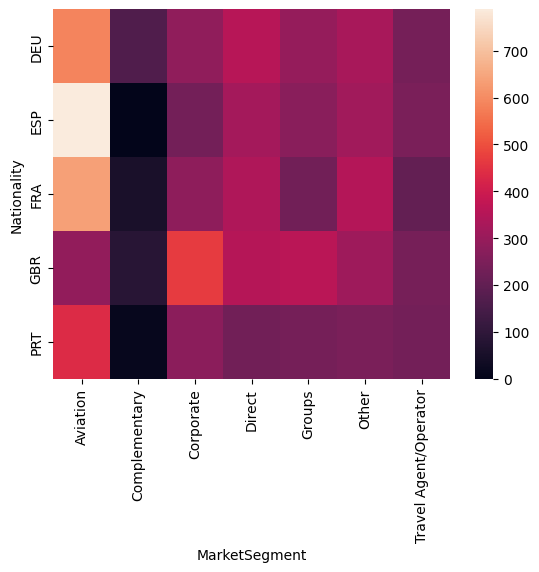

In [37]:
sns.heatmap(hotel_pivot.droplevel(0, axis=1))

In [38]:
hotels.iloc[:, :10].corr()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn
ID,1.000000,NaN,-0.132158,-0.986869,-0.147900,-0.099815,-0.160622,-0.018451,-0.012719,-0.283568
Nationality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,-0.132158,NaN,1.000000,0.129327,0.252229,0.053606,0.117694,0.004525,0.006748,0.133286
DaysSinceCreation,-0.986869,NaN,0.129327,1.000000,0.135926,0.090546,0.154925,0.018392,0.012798,0.276638
AverageLeadTime,-0.147900,NaN,0.252229,0.135926,1.000000,0.215844,0.239713,-0.015341,-0.011767,0.241790
LodgingRevenue,-0.099815,NaN,0.053606,0.090546,0.215844,1.000000,0.526299,0.070544,0.062202,0.423002
OtherRevenue,-0.160622,NaN,0.117694,0.154925,0.239713,0.526299,1.000000,0.043600,0.033985,0.302887
BookingsCanceled,-0.018451,NaN,0.004525,0.018392,-0.015341,0.070544,0.043600,1.000000,0.314696,0.462677
BookingsNoShowed,-0.012719,NaN,0.006748,0.012798,-0.011767,0.062202,0.033985,0.314696,1.000000,0.285094
BookingsCheckedIn,-0.283568,NaN,0.133286,0.276638,0.241790,0.423002,0.302887,0.462677,0.285094,1.000000


<Axes: >

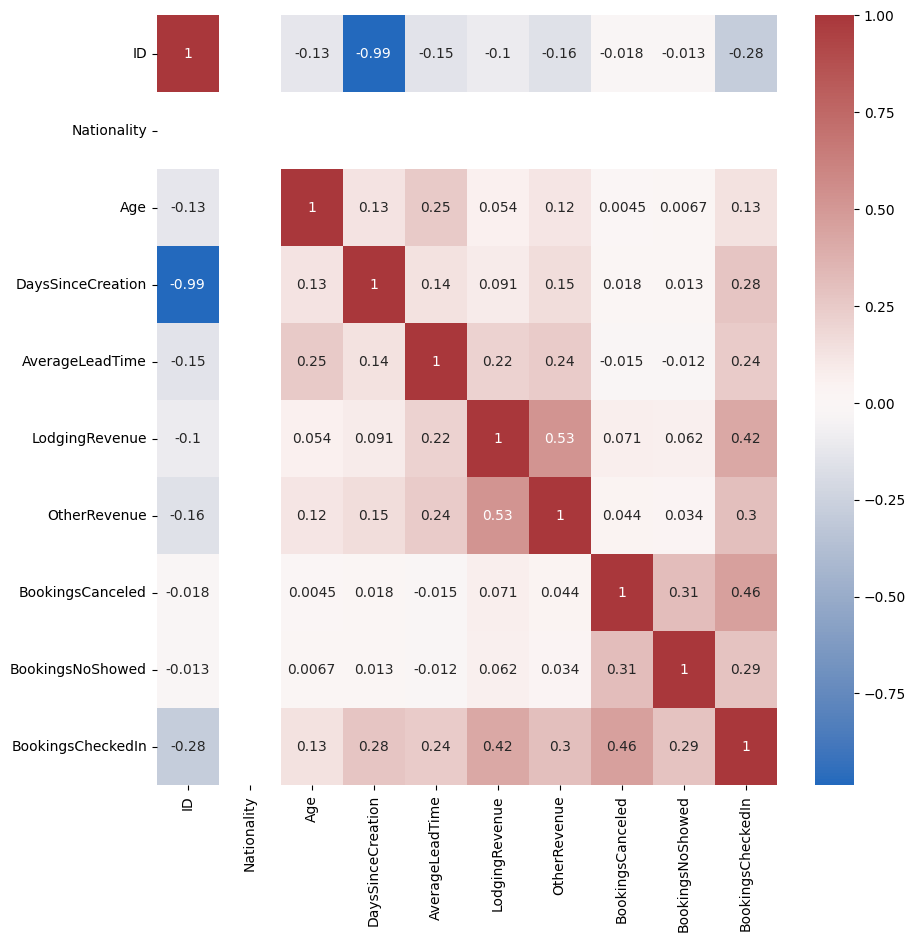

In [40]:
fig, ax = plt.subplots(figsize=(10, 10)) 

sns.heatmap(
    hotels.iloc[:, :10].corr(), 
    annot=True, 
    cmap="vlag"
)